In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
dataset = pd.read_csv("sales_data_with_revenue.csv")

In [6]:
# step 1: inspect dataset
# data exploration
# display first 5
dataset.head()

,product_category,units_sold,price_per_unit,is_returned,sale_date,total_revenue
0,C,96,356.542747,0,2020-01-01,5178.878929
1,D,94,386.211956,1,2020-01-02,4983.644721
2,A,47,52.772188,1,2020-01-03,1146.226516
3,C,99,257.990939,0,2020-01-04,5332.891565
4,C,55,466.687028,1,2020-01-05,2269.065707


In [7]:
# step 2: display last 5
dataset.tail()

,product_category,units_sold,price_per_unit,is_returned,sale_date,total_revenue
595,D,84,185.322662,1,2021-08-18,3752.724759
596,A,97,167.826404,1,2021-08-19,4996.688882
597,C,20,488.958529,0,2021-08-20,950.703783
598,D,12,108.420954,1,2021-08-21,237.410209
599,B,47,349.665031,1,2021-08-22,1756.339211


In [8]:
# step 3: display dataset summary
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_category  600 non-null    object 
 1   units_sold        600 non-null    int64  
 2   price_per_unit    600 non-null    float64
 3   is_returned       600 non-null    int64  
 4   sale_date         600 non-null    object 
 5   total_revenue     600 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 28.3+ KB


In [9]:
# step 4: check missing values
missing_values = dataset.isnull().sum()
print("\nmissing_values in each column:")
print(missing_values)



missing_values in each column:
product_category    0
units_sold          0
price_per_unit      0
is_returned         0
sale_date           0
total_revenue       0
dtype: int64


In [10]:
# step 5: displaybasic statistics
dataset.describe()

,units_sold,price_per_unit,is_returned,total_revenue
count,600.000000,600.000000,600.000000,600.000000
mean,49.755000,261.336305,0.498333,2060.081749
std,29.340753,142.508264,0.500414,1533.020936
min,1.000000,10.116387,0.000000,5.898860
25%,24.000000,136.865445,0.000000,752.983889
50%,51.000000,268.132628,0.000000,1622.882745
75%,75.000000,385.321422,1.000000,3182.433373
max,99.000000,499.683215,1.000000,5645.523507


In [12]:
# step 6: total revenue
total_revenue = dataset["total_revenue"].sum()
print(dataset["total_revenue"], {total_revenue})



0      34228.103699
1      36303.923836
2       2480.292836
3      25541.102923
4      25667.786524
           ...     
595    15567.103604
596    16279.161196
597     9779.170586
598     1301.051448
599    16434.256457
Name: total_revenue, Length: 600, dtype: float64 {7842087.086850101}


In [24]:
# step 7: total is_returned
total_is_returned = dataset.groupby("product_category")["is_returned"].sum()
print(total_is_returned)

product_category
A    65
B    78
C    70
D    86
Name: is_returned, dtype: int64


In [172]:
# step 8: category sales by units sold
category_sales = dataset.groupby("product_category")["units_sold"].sum().reset_index()
print(category_sales)

  product_category  units_sold
0                A        6574
1                B        7005
2                C        7166
3                D        9108


In [174]:
#step 9: grouping $aggregating data: price_per_unit
total_profit = dataset.groupby("product_category")["total_revenue"].sum().reset_index()
print("\ntotal revenue:")
print(total_profit)


total revenue:
  product_category  total_revenue
0                A   1.674041e+06
1                B   1.859220e+06
2                C   2.099517e+06
3                D   2.209310e+06


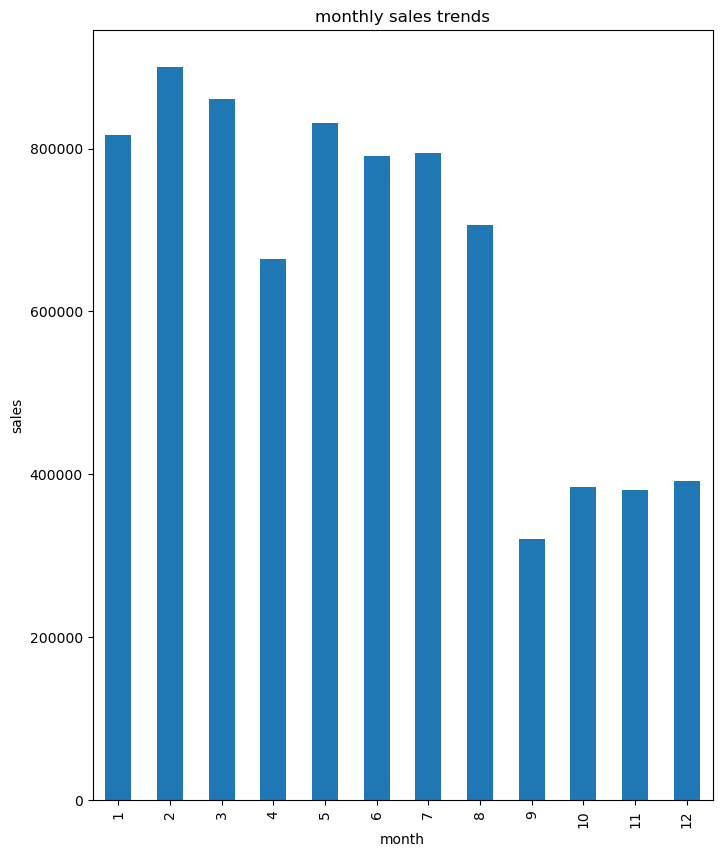

In [175]:
# step 10:revenue trend over time
#seasonality
dataset["sale_date"]=pd.to_datetime(dataset["sale_date"])
dataset["month"]=dataset["sale_date"].dt.month
monthly_sales=dataset.groupby("month")["total_revenue"].sum()
plt.figure(figsize=(8, 10))
monthly_sales.plot(kind="bar", title="monthly sales trends")
plt.xlabel("month")
plt.ylabel("sales")
plt.show()

In [179]:
# step 11: to find percentage returned
total_items = len(dataset)
returned_items = dataset['is_returned'].sum()
not_returned_items = total_items - returned_items
returned_percentage = (returned_items / total_items) * 100
not_returned_percentage = 100 - returned_percentage


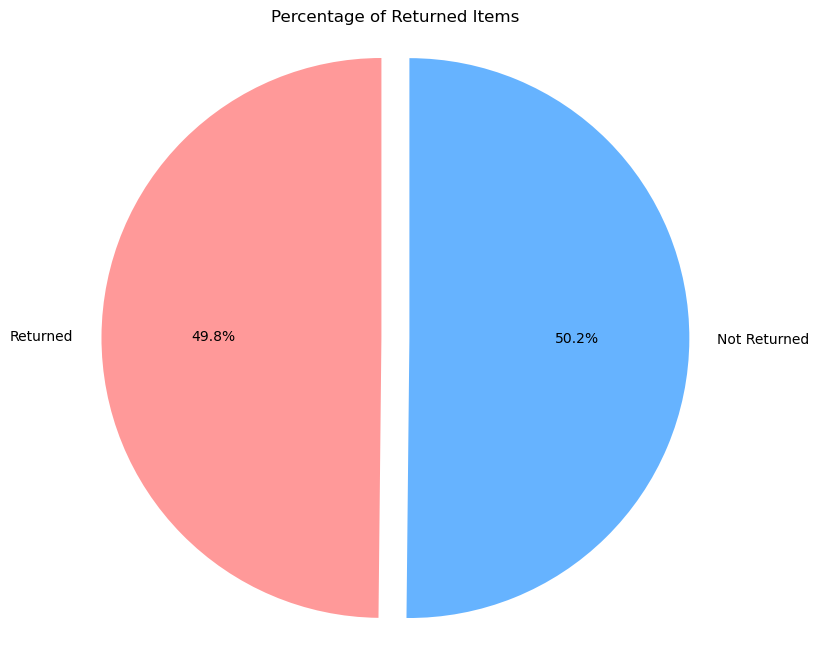

Returned items: 49.83%
Not returned items: 50.17%


In [182]:
plt.figure(figsize=(8, 8))
labels = ['Returned', 'Not Returned']
sizes = [returned_percentage, not_returned_percentage]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Percentage of Returned Items')
plt.show()
print(f"Returned items: {returned_percentage:.2f}%")
print(f"Not returned items: {not_returned_percentage:.2f}%")

In [185]:
# Step 12: Calculate revenue per unit
dataset['revenue_per_unit'] = dataset['total_revenue'] / dataset['units_sold']
#Estimate cost per unit (70% of price_per_unit)
dataset['estimated_cost_per_unit'] = dataset['price_per_unit'] * 0.7
#Calculate profit per unit
dataset['profit_per_unit'] = dataset['revenue_per_unit'] - dataset['estimated_cost_per_unit']
#Calculate profit margin
dataset['profit_margin'] = (dataset['profit_per_unit'] / dataset['revenue_per_unit']) * 100
#Group by product category and calculate average profit margin and total units sold
category_analysis = dataset.groupby('product_category').agg({
    'profit_margin': 'mean',
    'units_sold': 'sum'
}).reset_index()


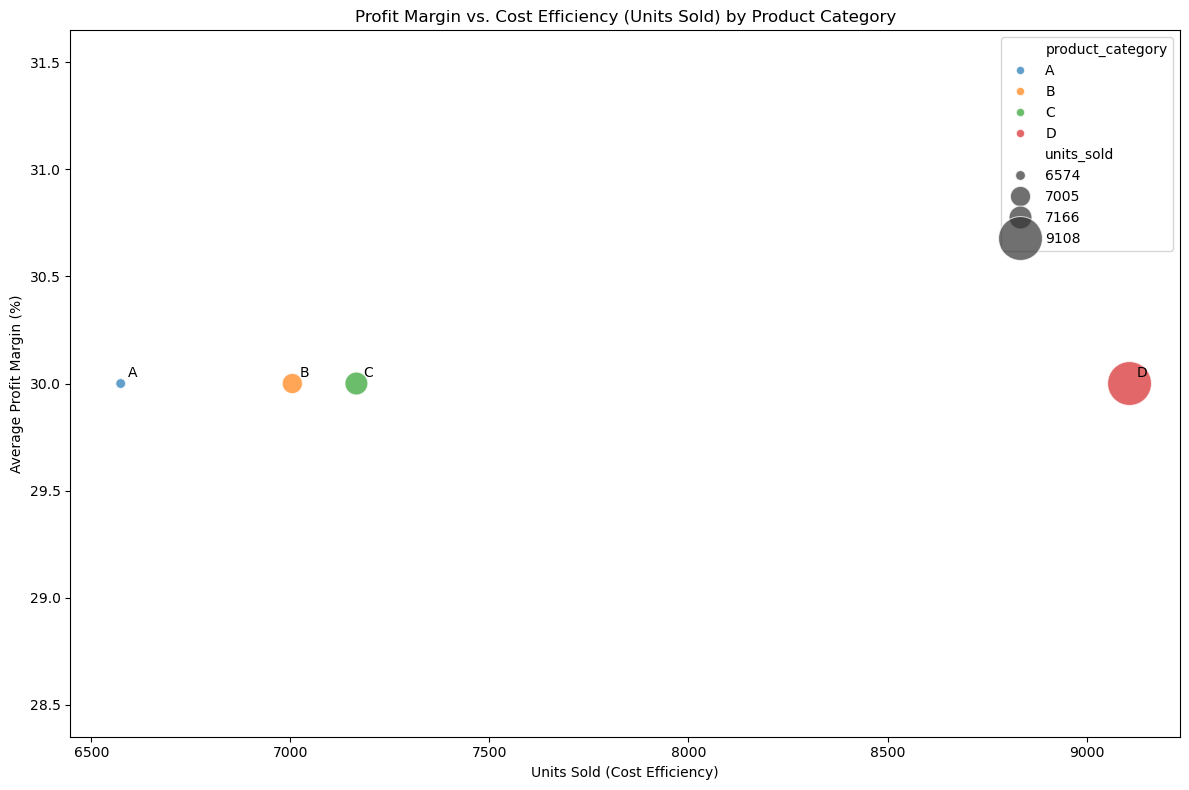

  product_category  profit_margin  units_sold
0                A           30.0        6574
1                B           30.0        7005
2                C           30.0        7166
3                D           30.0        9108


In [186]:
#Visualize profit margin vs. units sold by product category
plt.figure(figsize=(12, 8))
sns.scatterplot(data=category_analysis, x='units_sold', y='profit_margin', 
                hue='product_category', size='units_sold', sizes=(50, 1000), alpha=0.7)
plt.title('Profit Margin vs. Cost Efficiency (Units Sold) by Product Category')
plt.xlabel('Units Sold (Cost Efficiency)')
plt.ylabel('Average Profit Margin (%)')
# Annotate each point with the product category
for i, row in category_analysis.iterrows():
    plt.annotate(row['product_category'], (row['units_sold'], row['profit_margin']), 
                 xytext=(5, 5), textcoords='offset points')
plt.tight_layout()
plt.show()
# Print the category analysis
print(category_analysis.sort_values('profit_margin', ascending=False))


In [188]:
# Step 13:Convert sales_date to date time
dataset['sale_date'] = pd.to_datetime(dataset['sale_date'])

In [209]:
# Extract month and year
dataset['month'] = dataset['sale_date'].dt.month
dataset['year'] = dataset['sale_date'].dt.year
# Define Season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

dataset['season'] = dataset['month'].apply(get_season)


In [192]:
# Step 14: Group data by season and year, calculate total revenue
seasonal_revenue = dataset.groupby(['year', 'season'])['total_revenue'].sum().reset_index()
# Ensure all season-year combinations are present
all_years = dataset['year'].unique()
all_seasons = ['Winter', 'Spring', 'Summer', 'Fall']
idx = pd.MultiIndex.from_product([all_years, all_seasons], names=['year', 'season'])
seasonal_revenue = seasonal_revenue.set_index(['year', 'season']).reindex(idx).reset_index()
seasonal_revenue['total_revenue'] = seasonal_revenue['total_revenue'].fillna(0)

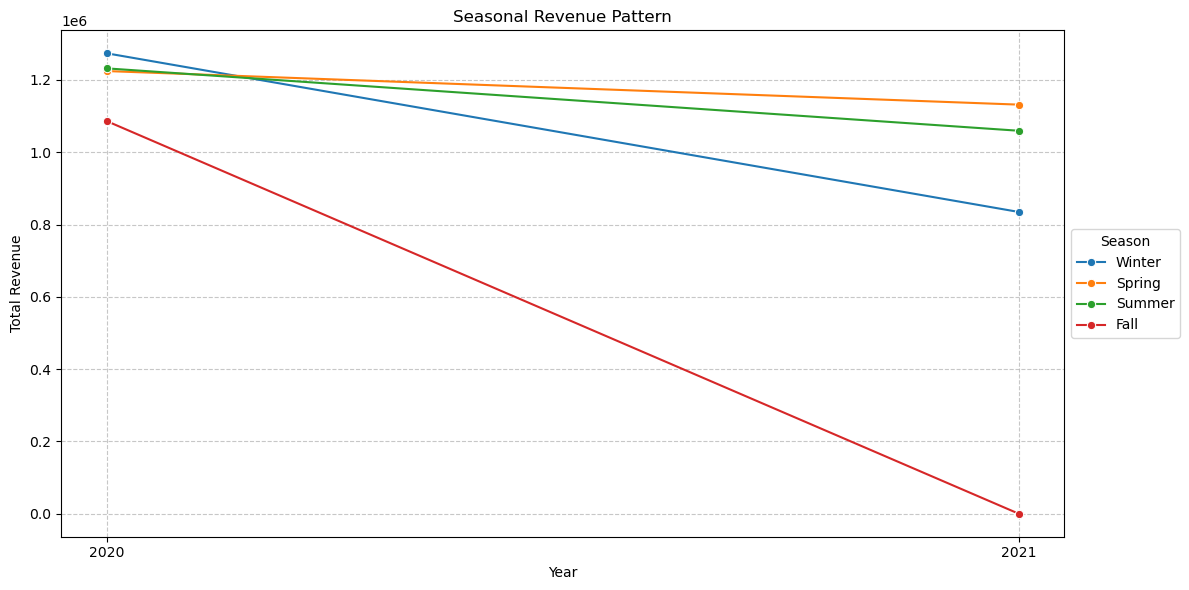

Average Revenue by Season:
season
Spring    1.178163e+06
Summer    1.145728e+06
Winter    1.054218e+06
Fall      5.429346e+05
Name: total_revenue, dtype: float64

Year-over-Year Growth by Season:
season
Spring   -0.075817
Summer   -0.140032
Winter   -0.344512
Fall     -1.000000
Name: yoy_growth, dtype: float64


In [193]:
# Step 15:Visualize the seasonal revenue pattern
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_revenue, x='year', y='total_revenue', hue='season', marker='o')
plt.title('Seasonal Revenue Pattern')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Season', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(all_years)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Calculate and print average revenue by season
avg_seasonal_revenue = seasonal_revenue.groupby('season')['total_revenue'].mean().sort_values(ascending=False)
print("Average Revenue by Season:")
print(avg_seasonal_revenue)
# Calculate year-over-year growth for each season
seasonal_revenue['yoy_growth'] = seasonal_revenue.groupby('season')['total_revenue'].pct_change()
print("\nYear-over-Year Growth by Season:")
print(seasonal_revenue.groupby('season')['yoy_growth'].mean().sort_values(ascending=False))



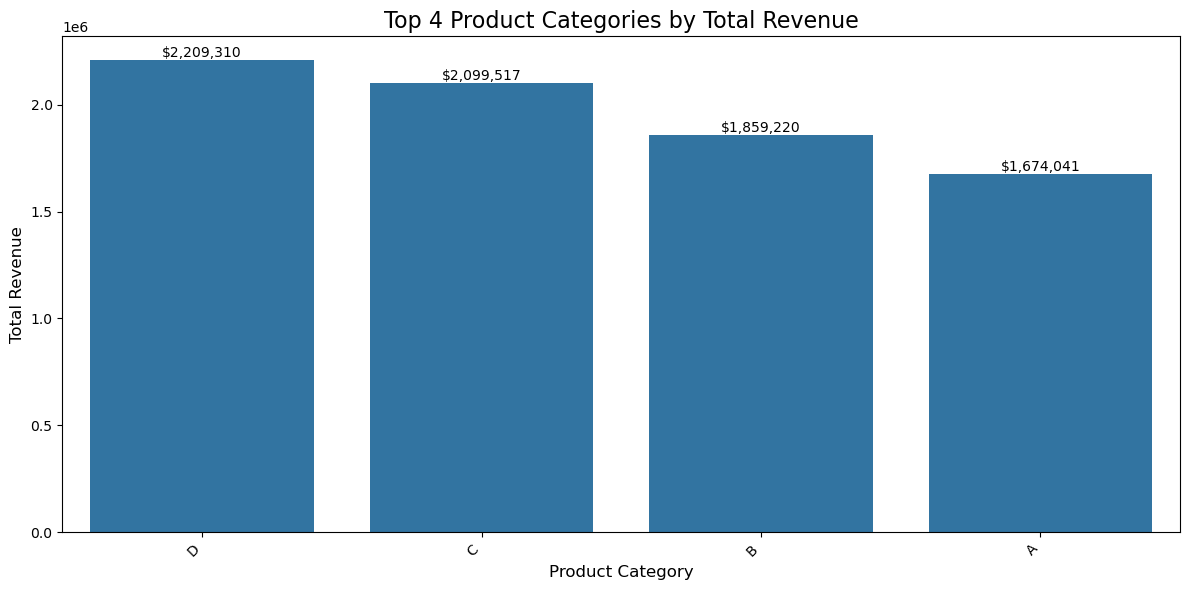

In [219]:
# Step 16: Top 4 perfoming products by total revenue
# Group by product category and sum the total revenue
category_revenue = dataset.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False)
# Select the top 4 categories
top_4_categories = category_revenue.head(4)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_4_categories.index, y=top_4_categories.values)
plt.title('Top 4 Product Categories by Total Revenue', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Add value labels on top of each bar
for i, v in enumerate(top_4_categories.values):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')
# Show the plot
plt.show()

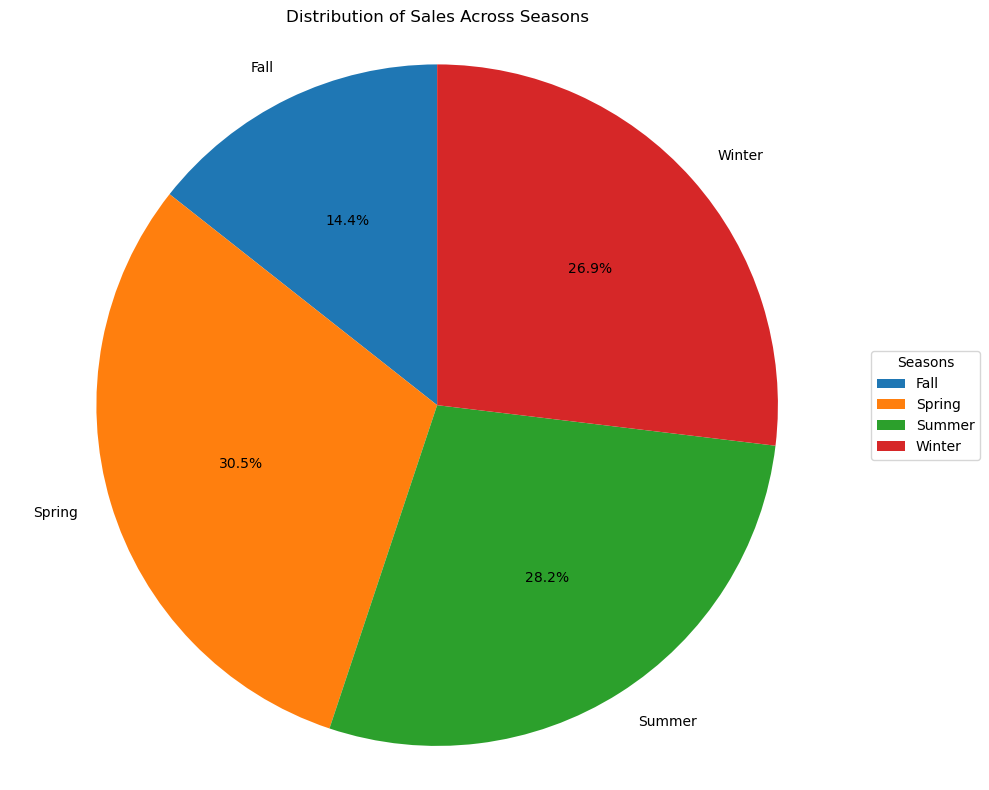

In [217]:
# Step 17: sales acroos different seasons
season_sales = dataset.groupby('season')['units_sold'].sum()
plt.figure(figsize=(10, 8))
plt.pie(season_sales.values, labels=season_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sales Across Seasons')
plt.axis('equal')
plt.legend(title="Seasons", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

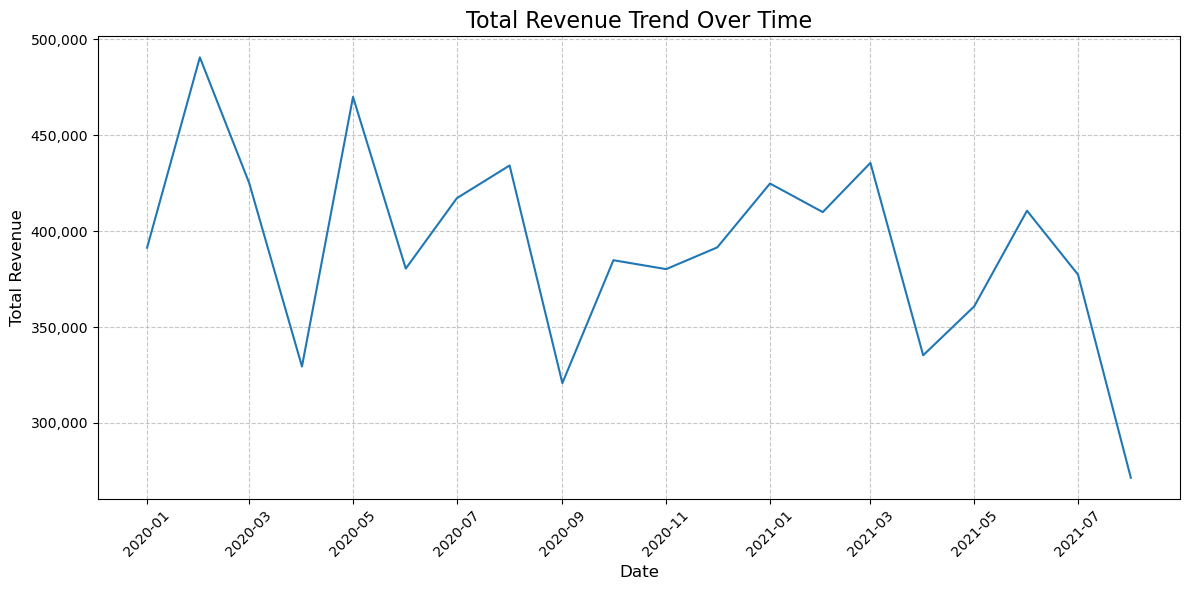

In [215]:
# Step 18: total revenue over time
# Create a datetime column combining year and month
dataset['date'] = pd.to_datetime(dataset[['year', 'month']].assign(day=1))
# Group by date and calculate total revenue
monthly_revenue = dataset.groupby('date')['total_revenue'].sum().reset_index()
# Sort the data by date
monthly_revenue = monthly_revenue.sort_values('date')
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_revenue', data=monthly_revenue)
plt.title('Total Revenue Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
# Format y-axis labels to show thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)
# Tight layout to prevent cutting off labels
plt.tight_layout()
# Show the plot
plt.show()